In [1]:
from preamble import *
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


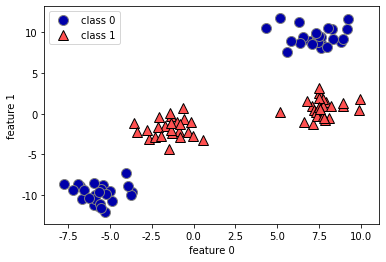

In [2]:
X,y = make_blobs(centers = 4,random_state = 8) #센터 네개로 모여있음
y = y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0","class 1"])

C:\anaco\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

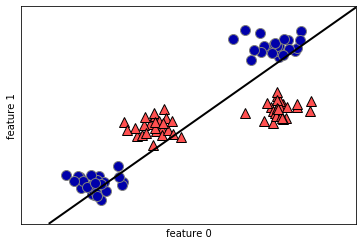

In [3]:
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

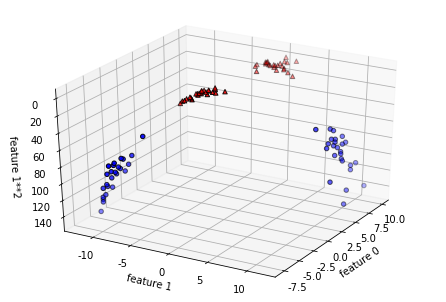

In [4]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

#두번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X,X[:,1:]**2]) #3차원으로 늘림 
figure = plt.figure()

#3차원 그래프
ax = Axes3D(figure, elev = -150,azim = -30)

#y==0인 포인트를 먼저 그리고 그다음 y==1인 포인트를 그린다.
mask = y ==0
ax.scatter (X_new[mask,0],X_new[mask,1],X_new[mask,2],c = 'b',edgecolor = 'k') #y값이 0인 원소 그리기
ax.scatter (X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c = 'r',marker = '^',edgecolor = 'k') #y가 1인 원소 그리기
ax.set_xlabel("feature 0 ")
ax.set_ylabel("feature 1 ")
ax.set_zlabel("feature 1**2")
plt.show()

C:\anaco\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature 1 **2')

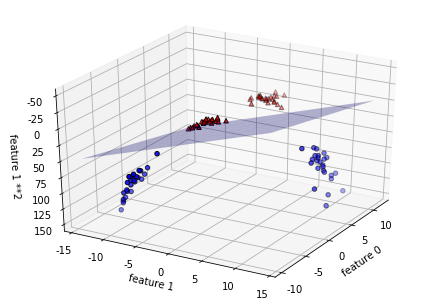

In [6]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

#선형 결정 경계그리기
figure = plt.figure()
ax = Axes3D(figure, elev = -150,azim = -30)
#범위
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY + intercept)/-coef[2]

#3차원 그리기
ax.plot_surface(XX,YY,ZZ,rstride = 8,cstride = 8,alpha = 0.3)
ax.scatter (X_new[mask,0],X_new[mask,1],X_new[mask,2],c = 'b',edgecolor = 'k') #y값이 0인 원소 그리기
ax.scatter (X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c = 'r',marker = '^',edgecolor = 'k') #y가 1인 원소 그리기

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 **2")